# Chapter: Best Practices

# Topic: Validation Curve

In [2]:
# read data
import numpy as np
data = np.loadtxt('quadratic_raw_data.csv', delimiter=',')
x = data[:,0,None]; y = data[:,1,None]

In [3]:
# create pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipe = Pipeline([('poly', PolynomialFeatures(include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('model', LinearRegression())])

In [4]:
# separate fitting and validation data
from sklearn.model_selection import train_test_split
x_fit, x_val, y_fit, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

In [5]:
# assess performance on validation sets for different hyper-parameter values
from sklearn.metrics import mean_squared_error as mse
fit_MSEs = []
validation_MSEs = [] 

for poly_degree in range(1,6):
    # set hyper-parameter value
    pipe['poly'].degree = poly_degree
    
    # fit & predict
    pipe.fit(x_fit, y_fit)
    y_pred_fit = pipe.predict(x_fit)
    y_pred_val = pipe.predict(x_val)
    
    # compute scores and append
    fit_MSE = mse(y_fit, y_pred_fit)
    validation_MSE = mse(y_val, y_pred_val)
    fit_MSEs.append(fit_MSE), validation_MSEs.append(validation_MSE)

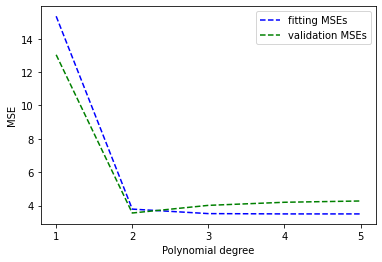

In [6]:
# plot validation curve
from matplotlib import pyplot as plt
plt.figure()
plt.plot(np.arange(1,6), fit_MSEs, 'b--', label='fitting MSEs')
plt.plot(np.arange(1,6), validation_MSEs, 'g--', label='validation MSEs')
plt.legend(), plt.xlabel('Polynomial degree'), plt.ylabel('MSE')
plt.xticks([1,2,3,4,5])
plt.show()